<a href="https://colab.research.google.com/github/simionattovini/hydraulic-machines/blob/main/Test%20Solutions/MHA_P2_1s2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Hidráulicas A - P2 - 1S2024

## Enunciado

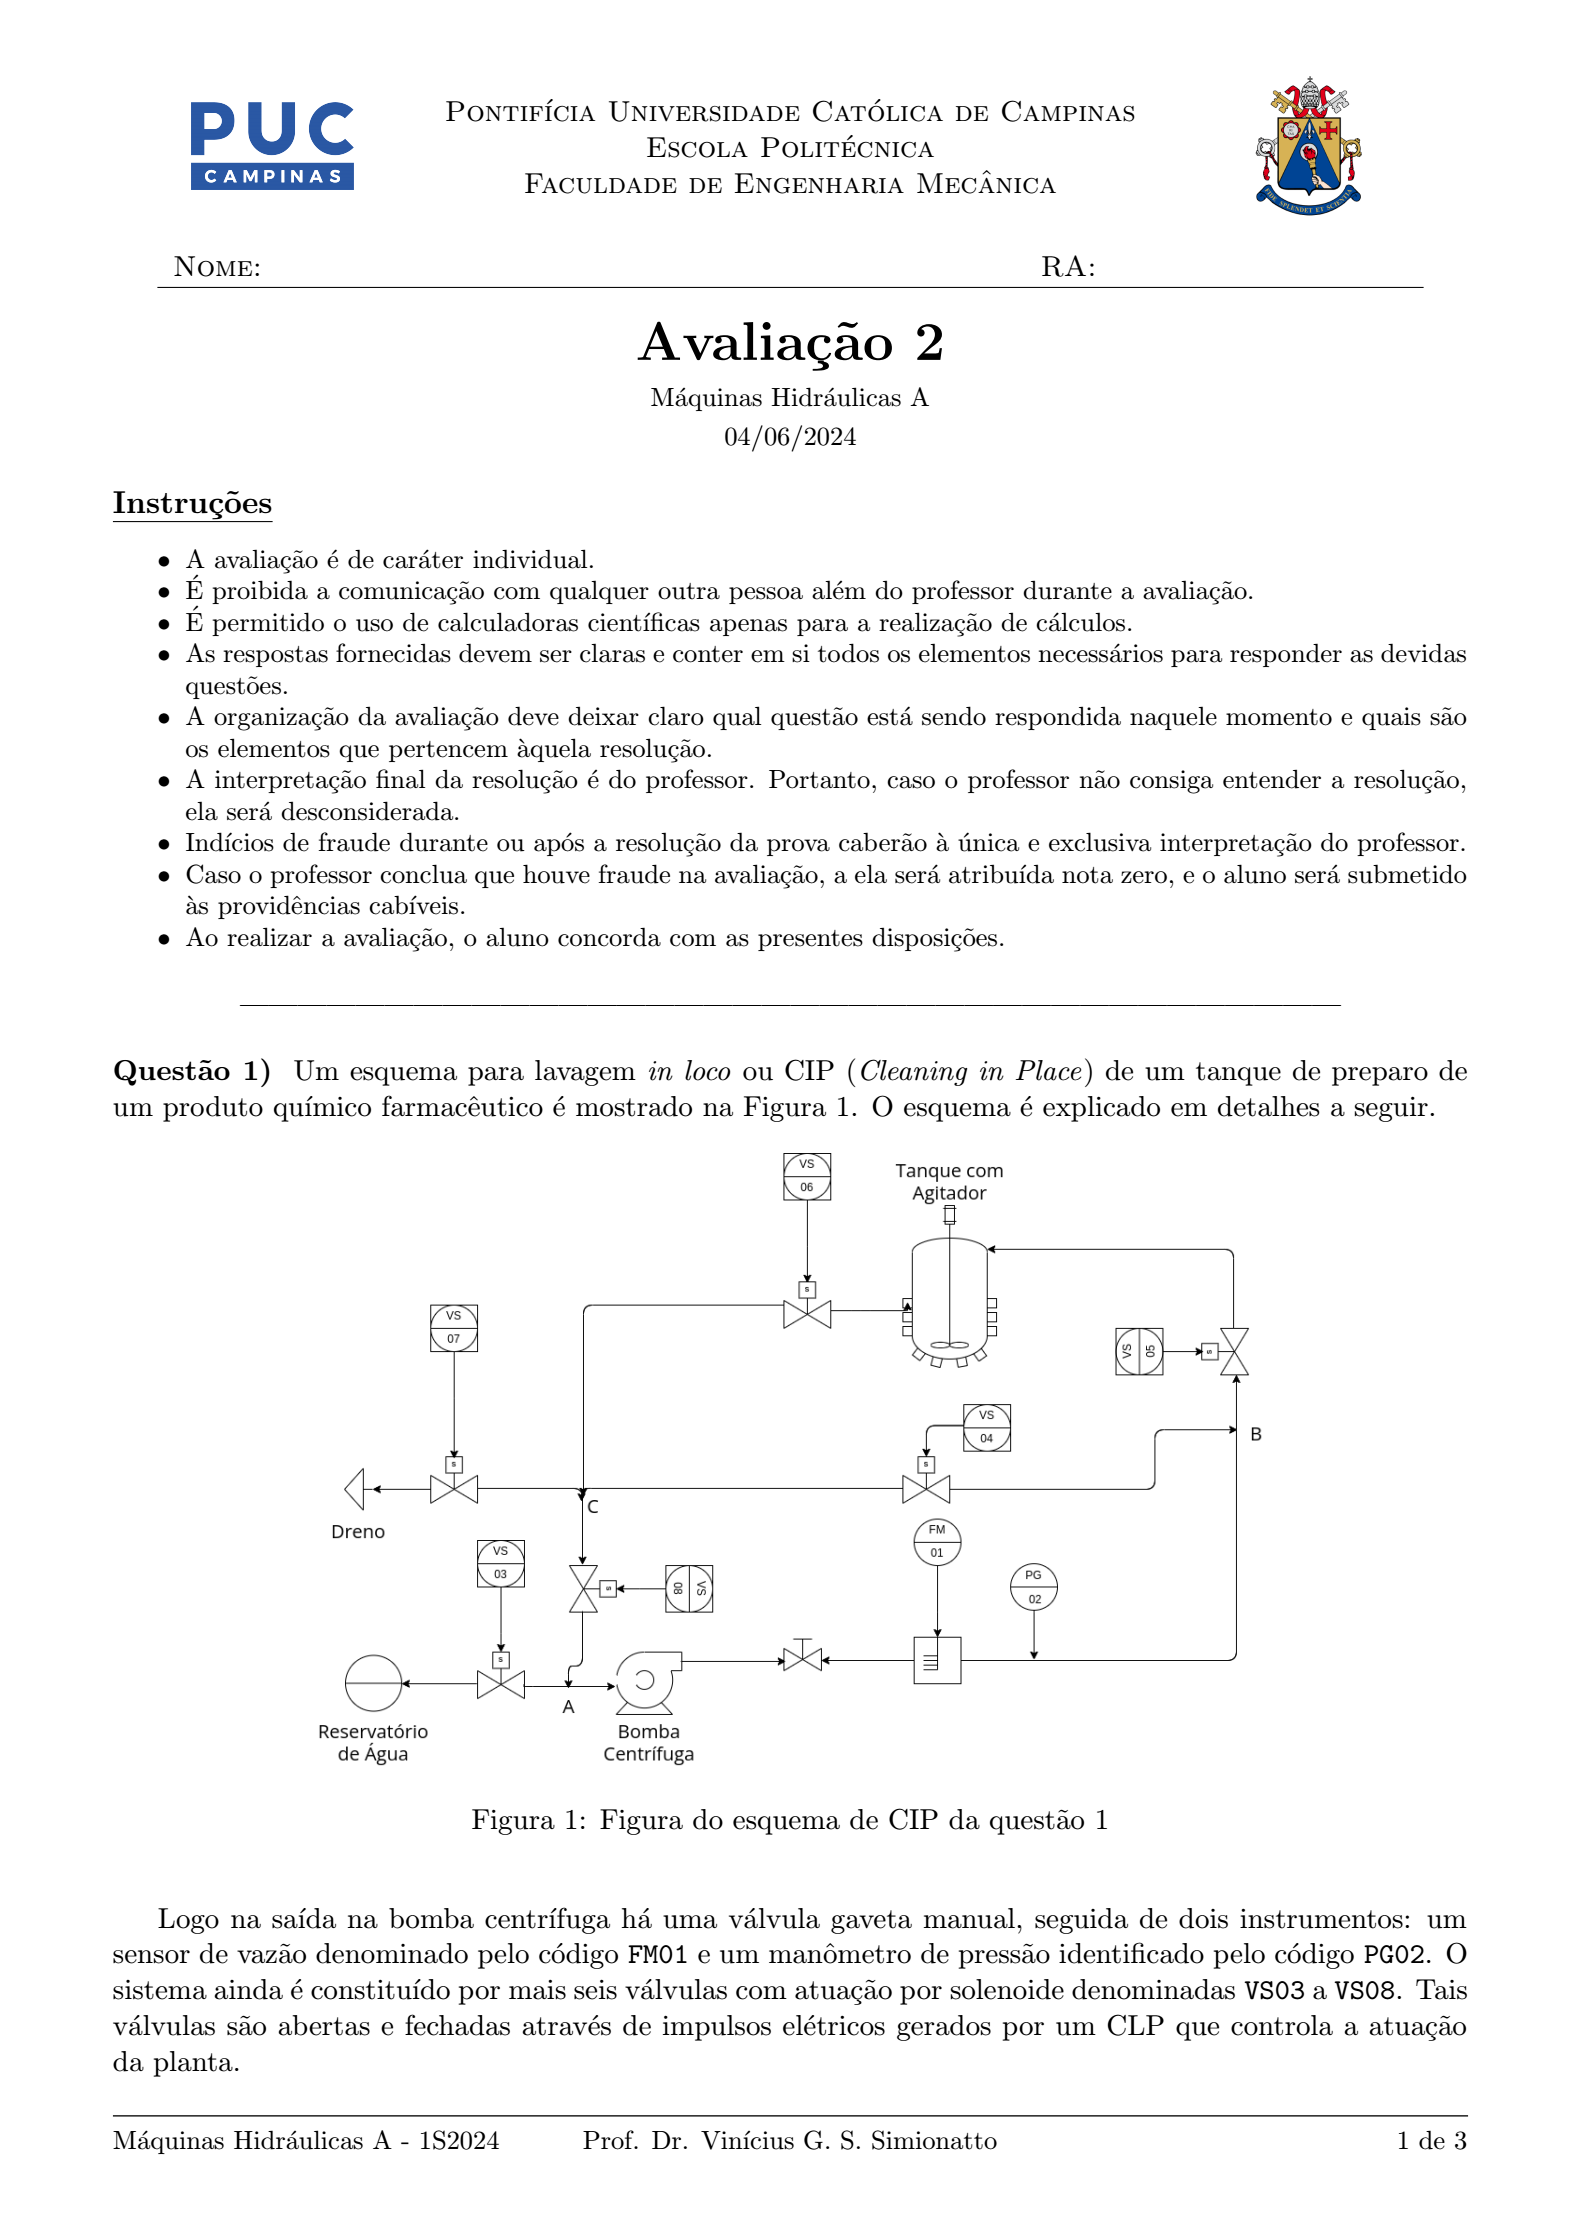

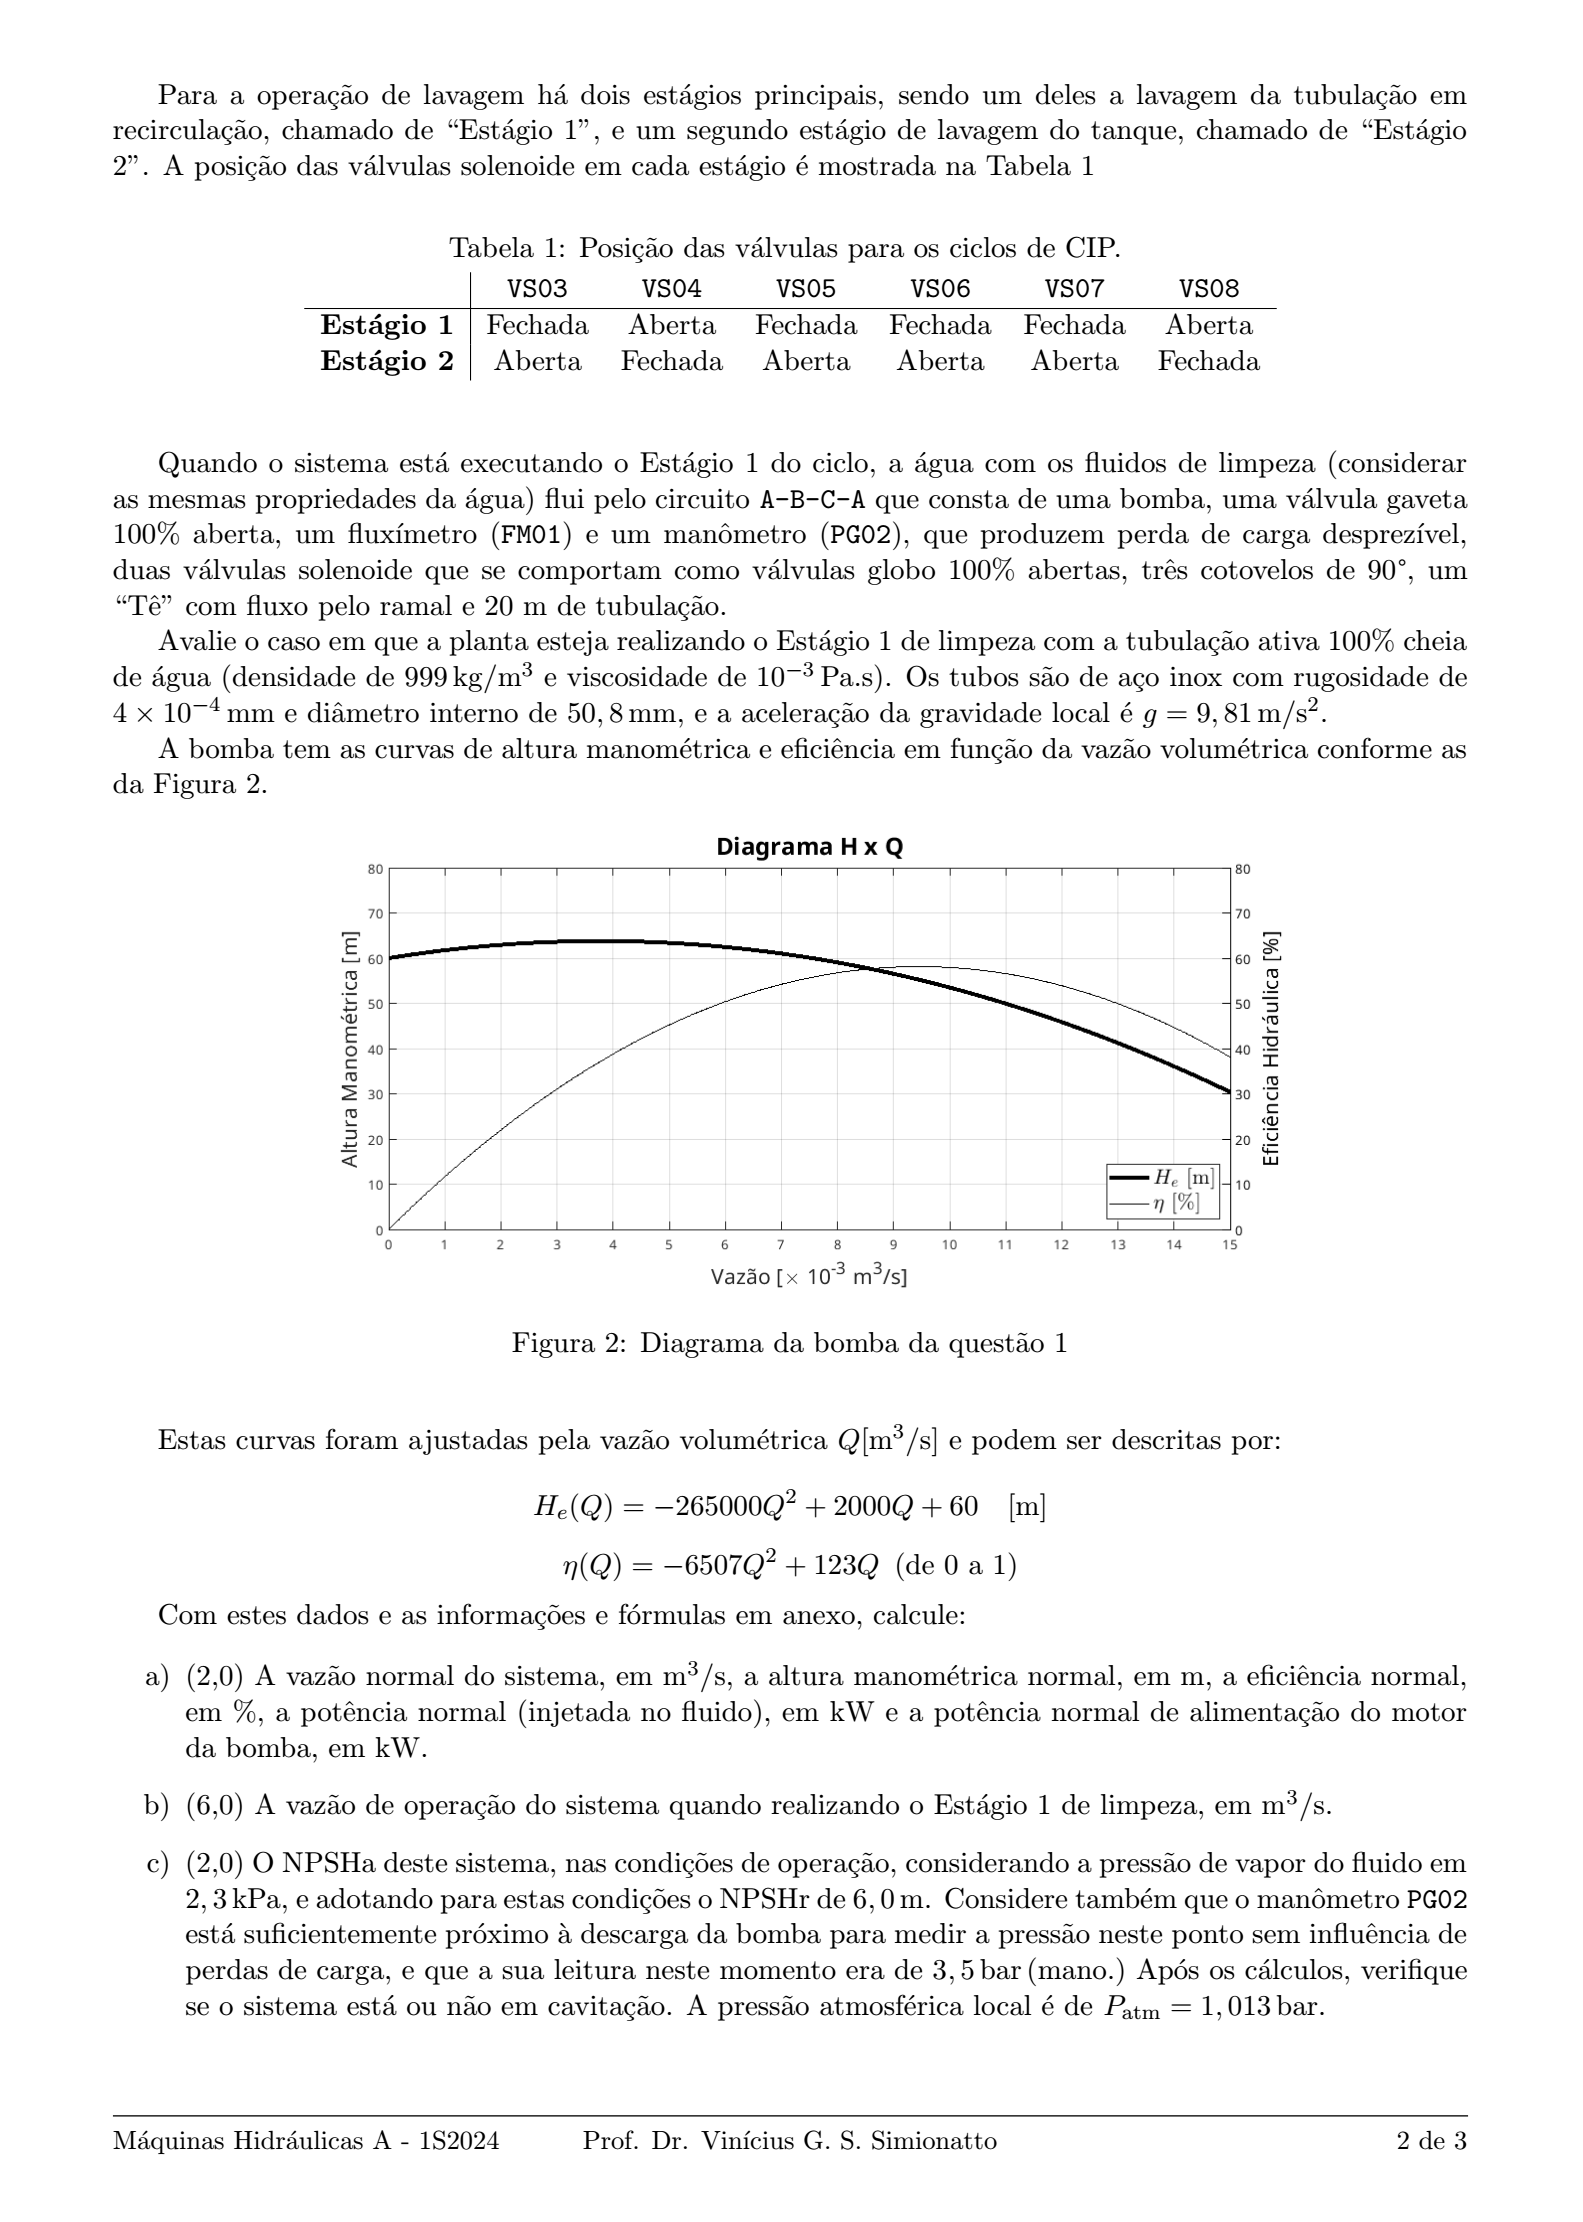

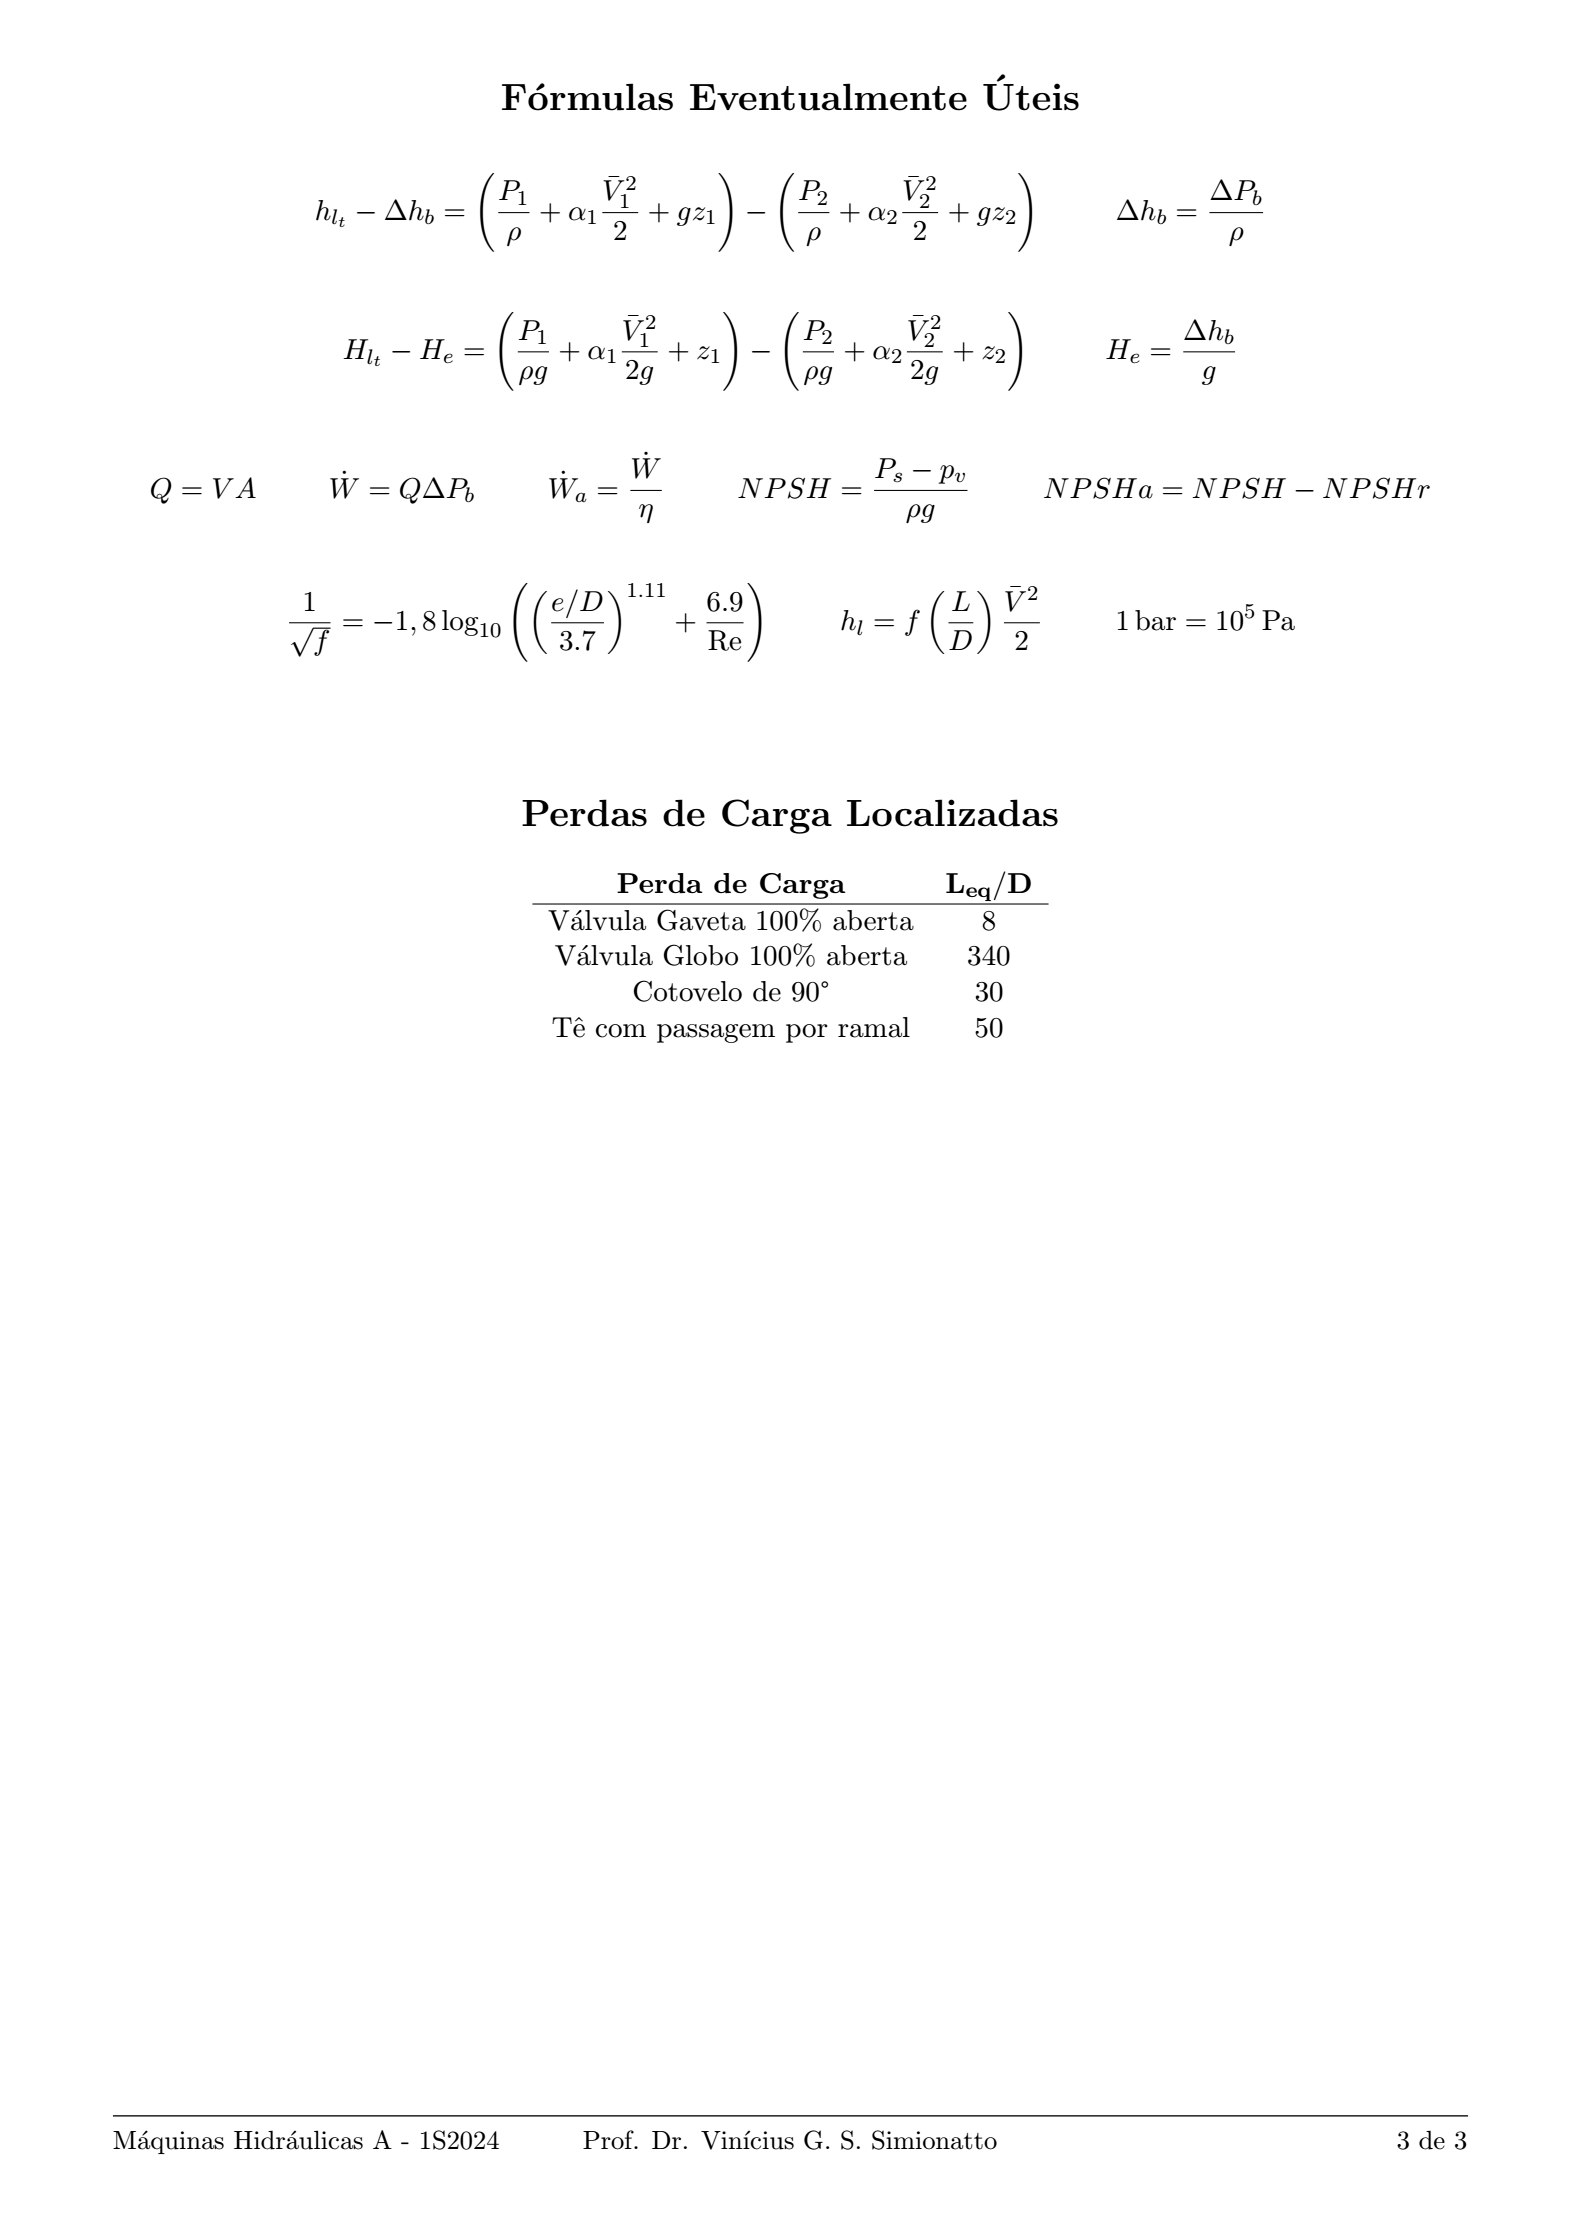

## Resolução

### Questão 1 a)

A vazão normal da bomba pode ser obtida através da curva de eficiência da bomba, pois a vazão normal é a vazão na qual a eficiência da bomba é máxima.

Como temos disponível a curva ajustada da eficiência em função da vazão, podemos encontrar o máximo local desta curva através de:

$$
\frac{d\eta}{dQ} = 0 = -2\,.\,6507Q + 123
$$

$$
\therefore Q_n := Q = \frac{123}{2\,.\,6507}
$$

O resultado se encontra no script a seguir.

In [ ]:
%reset -f

Qn = 123/(2*6507)

print(f'Qn = {Qn:.4e} m³/s')

Qn = 9.4514e-03 m³/s


A altura manométrica normal pode ser obtida através da curva fornecida para a altura manométrica, com $Q = Q_n$:

In [ ]:
Hen = -265000*Qn**2 + 2000*Qn + 60

print(f'He(Qn) = {Hen:.2f} m')

He(Qn) = 55.23 m


Da mesma forma, a eficiência normal pode ser calculada por $\eta(Q_n)$:

In [ ]:
eta_n = -6507*Qn**2+123*Qn

print(f'eta_n = {100*eta_n:.2f} %')

eta_n = 58.13 %


A potência normal injetada no fluido pode ser calculada por:

$$
\dot{W_n} = Q_n\Delta P_{bn} = Q_n\rho\Delta h_{bn} = Q_n\rho g H_{en}
$$

In [ ]:
rho = 999  # kg/m³
g = 9.81   # m/s²

Wn = rho*g*Qn*Hen

print(f'Wn = {Wn/1000:.2f} kW')

Wn = 5.12 kW


A potência normal de alimentação do motor da bomba pode ser calculada por:

$$
\dot{W}_{an} = \frac{\dot{W}_n}{\eta_n}
$$

In [ ]:
Wan = Wn/eta_n

print(f'Wan = {Wan/1000:.2f} kW')

Wan = 8.80 kW


### Questão 1 b)

Para calcular a vazão de operação, utilizaremos a fórmula:

$$
H_{l_t} - H_e = \left(\frac{P_1}{\rho g} + \alpha_1 \frac{\bar{V}_1^2}{2 g}+ z_1\right) - \left(\frac{P_2}{\rho g} + \alpha_2 \frac{\bar{V}_2^2}{2 g}+ z_2\right)
$$

Como neste caso o sistema é fechado, para calcular a vazão teremos que iniciar e terminar a análise exatamente no mesmo ponto. Por este motivo, o lado direito desta equação é nulo. Do lado esquerdo temos:

$$
H_{l_t} = \underbrace{\frac{f}{g}\left(\frac{20}{0,0508}\right)\frac{\bar{V}^2}{2}}_{\mathrm{tubo}}+
\underbrace{3\times\frac{f}{g}\left(30\right)\frac{\bar{V}^2}{2}}_{\mathrm{cotovelos}}+
\underbrace{\frac{f}{g}\left(8\right)\frac{\bar{V}^2}{2}}_{\mathrm{Válv. Gaveta}}+
\underbrace{2\times\frac{f}{g}\left(340\right)\frac{\bar{V}^2}{2}}_{\mathrm{Válv. Globo}} = \phi f \bar{V}^2
$$

O valor de $\phi$ é calculado a seguir:

In [ ]:
L = 20
D = 0.0508

phi = (20/0.0508 + 3*30 + 8 + 2*340)/(2*g)

print(f'phi = {phi:.2f}')

phi = 59.72


Utilizando $Q = \bar{V} A$, podemos calcular $H_{l_t}$ em função de $Q$:

$$
H_{l_t} = \phi f \bar{V}^2 = \phi f \left(\frac{Q}{A}\right)^2 = \phi f \left(\frac{4Q}{\pi D^2}\right)^2 = \left(\frac{16 \phi}{\pi^2 D^4}\right)fQ^2 = \phi'fQ^2
$$

O valor de $\phi'$ = é calculado a seguir:

In [ ]:
from numpy import pi

phi_p = 16*phi/(pi**2*D**4)

print(f'phi\' = {phi_p:.2f}')

phi' = 14537278.38


E da equação principal, temos que:

$$
H_e = H_{l_t}
$$

Assim:
$$
-265000 Q^2 + 2000Q + 60 = \phi' f Q^2
$$

Ou seja, precisa-se calcular as raízes da equação:
$$
(-\phi'f-265000)Q^2 + 2000 Q + 60 = 0
$$

Para isso é necessário calcular o valor de $f$, que depende da vazão. Por isso é necessário utilizar o método de iteração de ponto fixo.

Como tentativa inicial para o valor de $Q$, pode-se utilizar (não obrigatoriamente) o valor da vazão normal $Q_n$.

O resultado para a primeira aproximação de $f$ é mostrado a seguir:

In [ ]:
from numpy import log10

def f_haaland(e, D, Re):
  return (-1.8*log10(((e/D)/3.7)**1.11 + 6.9/Re))**-2

e = 4e-7  # mm
A = pi*D**2/4
u = 1e-3  # Pa.s

V_aprox = Qn/A

Re = rho*V_aprox*D/u

f_aprox = f_haaland(e, D, Re)

print(f'f ~ {f_aprox:.4f}')

f ~ 0.0151


Com este valor, basta calcular as raízes do polinômio citado anteriormente, excluir as raízes inválidas e utilizar este resultado para calcular uma nova aproximação.

O primeiro passo é mostrado abaixo:

In [ ]:
from numpy import roots

Q_12 = roots([-phi_p*f_aprox-265000, 2000, 60])

Q_aprox = max(Q_12)
# Calcula-se o máximo pois a raiz inválida é negativa.

print(f'Q ~ {Q_aprox*1000:.2f} x 10⁻³ m³/s')

Q ~ 13.39 x 10⁻³ m³/s


A título de exemplo, calculamos a aproximação novamente mais 10 vezes:

In [ ]:
for c1 in range(10):
  V_aprox = Q_aprox/A
  Re = rho*V_aprox*D/u
  f_aprox = f_haaland(e, D, Re)
  Q_12 = roots([-phi_p*f_aprox-265000, 2000, 60])
  Q_aprox = max(Q_12)
  print(f'Iteração {c1+1}: Q ~ {Q_aprox*1000:.2f} x 10⁻³ m³/s')

f = f_aprox
Q = Q_aprox

print(f'f ~ {f_aprox:.6f}')

Iteração 1: Q ~ 13.62 x 10⁻³ m³/s
Iteração 2: Q ~ 13.63 x 10⁻³ m³/s
Iteração 3: Q ~ 13.63 x 10⁻³ m³/s
Iteração 4: Q ~ 13.63 x 10⁻³ m³/s
Iteração 5: Q ~ 13.63 x 10⁻³ m³/s
Iteração 6: Q ~ 13.63 x 10⁻³ m³/s
Iteração 7: Q ~ 13.63 x 10⁻³ m³/s
Iteração 8: Q ~ 13.63 x 10⁻³ m³/s
Iteração 9: Q ~ 13.63 x 10⁻³ m³/s
Iteração 10: Q ~ 13.63 x 10⁻³ m³/s
f ~ 0.014070


Como se pode observar, bastavam duas iterações para o método convergir suficientemente.

### Questão 1 c)

Para calcular o NPSH da bomba, é necessário aplicar novamente a equação da perda de carga, mas desta vez com o ponto 2 na sucção da bomba. O único ponto a juzante conhecido é a descarga da bomba, então nela ficará o ponto 1.

Assim, aplica-se novamente a equação:
$$
H_{l_t} - H_e = \left(\frac{P_1}{\rho g} + \alpha_1 \frac{\bar{V}_1^2}{2 g}+ z_1\right) - \left(\frac{P_2}{\rho g} + \alpha_2 \frac{\bar{V}_2^2}{2 g}+ z_2\right)
$$

Neste caso as pressões $P_1$ e $P_2$ são diferentes, mas as velocidades $\bar{V}_1$ e $\bar{V}_2$ são iguais, e não há elevações apreciáveis neste sistema. Além disso, não há bomba no trajeto analisado. Assim, a equação se torna:
$$
H_{l_t} = \frac{P_1-P_2}{\rho g} = \phi'fQ^2
$$

Assim, $P_2$ pode ser calculada por:
$$
P_2 = P_1 - \rho g \phi' f Q^2
$$

A pressão $P_1$ deve ser calculada de maneira absoluta. Assim, $P_1 = 3,5 \, \mathrm{bar} + 1,013\,\mathrm{bar} = 451300 \,\mathrm{Pa}$.

Com o valor da pressão calculado, basta utilizar:
$$
\mathrm{NPSH} = \frac{P_2-p_v}{\rho g}
$$

E então:
$$
\mathrm{NPSHa} = \mathrm{NPSH} - \mathrm{NPSHr}
$$

Os valores são mostrados a seguir:

In [ ]:
P1 = 451300  # Pa
P2 = P1 - rho*g*phi_p*f*Q**2

print(f'P2 = {P2:.2f} Pa (abs.)')

pv = 2300  # Pa

NPSH = (P2-pv)/(rho*g)

NPSHr = 6  # m

NPSHa = NPSH - NPSHr

print(f'NPSH = {NPSH:.2f} m')
print(f'NPSHa = {NPSHa:.2f} m')

P2 = 78751.99 Pa (abs.)
NPSH = 7.80 m
NPSHa = 1.80 m
